The source of this file lives locally at:
/Users/benjaminroulston/Dropbox/Research/Projects/Variable_Stars/WORKING_DIRECTORY/Statistical_Testing/LC_stat_calculations/Control_StatsCalc/VarStar_make_Var-notVar_cuts.ipynb

In [1]:
import numpy as np

from astropy.table import Table, hstack
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pickle
import os
import paths

In [3]:
data_path = paths.data / "Var_notVar_data"

VarStar_properties1 = Table.read(paths.static / "TDSS_SES+PREV_DR16DR12griLT20_GaiaEDR3_Drake2014PerVar_CSSID_ZTFIDs_LCpointer_PyHammer_EqW_LCProps.fits")
VarStar_properties2 = Table.read(paths.static / "VarStar_LCSTATS2.fits")
VarStar_properties3 = Table.read(paths.static / "VarStar_rawSigmaAboveBelow.fits")

VarStar_properties = hstack([VarStar_properties1, VarStar_properties2, VarStar_properties3])
VarStar_properties.remove_columns(['ra_2', 'dec_2', 'ra_3', 'dec_3'])

# control_properties1 = Table.read(paths.static / "VarStar_Control_LCSTATS_withP.fits")
# control_properties2 = Table.read(paths.static / "VarStar_Controljittered_rawSigmaAboveBelow.fits")

# control_properties = hstack([control_properties1, control_properties2])

current_full_index = Table.read(data_path / 'full_index_table.fits')

full_index = current_full_index['full_index']


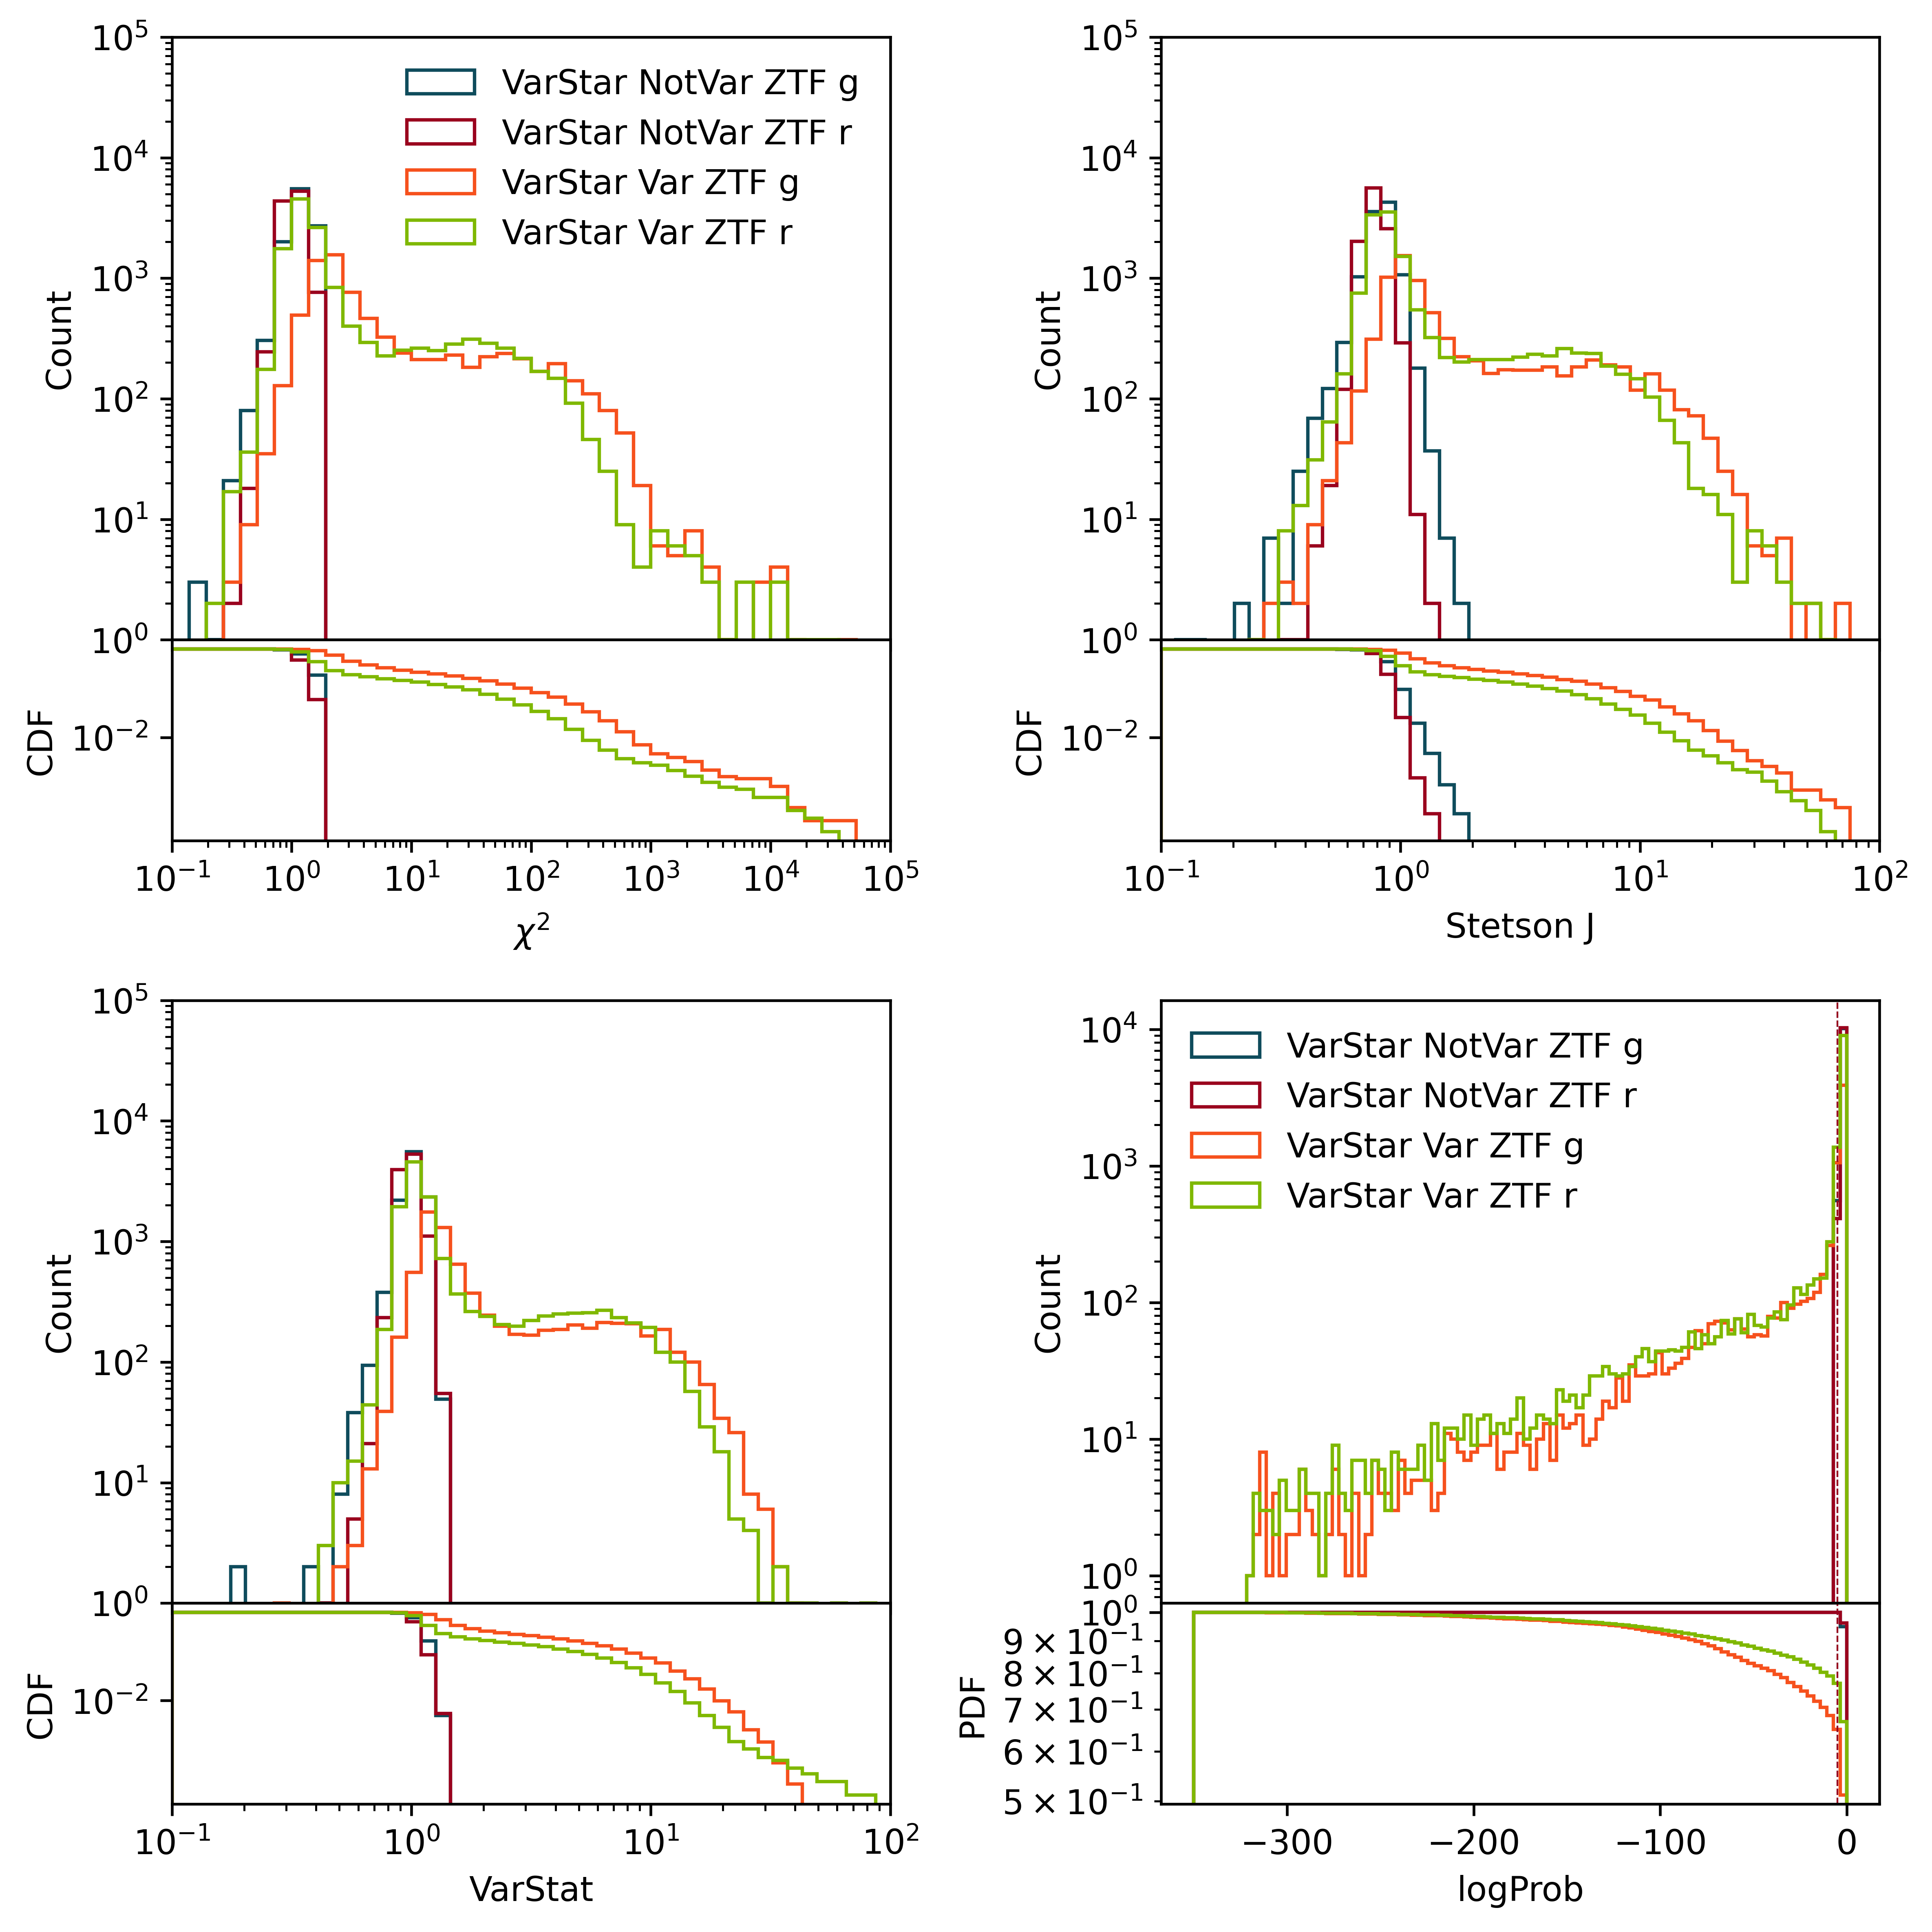

In [4]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True, dpi=600)

gs0 = gridspec.GridSpec(2, 2, figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0, 0], hspace=0.0, height_ratios=[0.75, 0.25])
gs01 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[0, 1], hspace=0.0, height_ratios=[0.75, 0.25])
gs10 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1, 0], hspace=0.0, height_ratios=[0.75, 0.25])
gs11 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs0[1, 1], hspace=0.0, height_ratios=[0.75, 0.25])

ax1 = fig.add_subplot(gs00[0,0])
ax15 = fig.add_subplot(gs00[1,0], sharex=ax1)

ax2 = fig.add_subplot(gs01[0, 0])
ax25 = fig.add_subplot(gs01[1, 0], sharex=ax2)

ax3 = fig.add_subplot(gs10[0, 0])
ax35 = fig.add_subplot(gs10[1, 0], sharex=ax3)

ax4 = fig.add_subplot(gs11[0, 0])
ax45 = fig.add_subplot(gs11[1, 0], sharex=ax4)

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax4.get_xticklabels(), visible=False)

# plt.setp(ax2.get_yticklabels(), visible=False)
# plt.setp(ax25.get_yticklabels(), visible=False)

# plt.setp(ax4.get_yticklabels(), visible=False)
# plt.setp(ax45.get_yticklabels(), visible=False)

########################################################

bins = np.logspace(-2, 5, 50)

ax1.hist(VarStar_properties[~full_index]['ZTF_g_Chi2'], bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=False, cumulative=False)
ax1.hist(VarStar_properties[~full_index]['ZTF_r_Chi2'], bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=False, cumulative=False)

ax1.hist(VarStar_properties[full_index]['ZTF_g_Chi2'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=False, cumulative=False)
ax1.hist(VarStar_properties[full_index]['ZTF_r_Chi2'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=False, cumulative=False)

ax1.set_xscale('log')
ax1.set_ylabel('Count')

ax15.hist(VarStar_properties[~full_index]['ZTF_g_Chi2'], bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=True, cumulative=-1)
ax15.hist(VarStar_properties[~full_index]['ZTF_r_Chi2'], bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=True, cumulative=-1)

ax15.hist(VarStar_properties[full_index]['ZTF_g_Chi2'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=True, cumulative=-1)
ax15.hist(VarStar_properties[full_index]['ZTF_r_Chi2'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=True, cumulative=-1)

# ax2.axhline(y=0.5, c='r', lw=0.5, ls='dashed')

# # ax1.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_Chi2'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax1.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_Chi2'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax1.axvline(x=np.nanpercentile(control_properties['ZTF_g_Chi2'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax1.axvline(x=np.nanpercentile(control_properties['ZTF_r_Chi2'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)

# # ax15.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_Chi2'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax15.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_Chi2'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax15.axvline(x=np.nanpercentile(control_properties['ZTF_g_Chi2'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax15.axvline(x=np.nanpercentile(control_properties['ZTF_r_Chi2'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)


# ax1.minorticks_on()

ax15.set_xlabel('$\chi^2$')
ax15.set_ylabel('CDF')

ax1.set_xlim(1e-1, 1e5)
ax1.set_ylim(1e0, 1e5)

# ax1.legend(loc=(0.0,1.01), ncol=4, frameon=False)
ax1.legend(loc='best', ncol=1, frameon=False)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4, frameon=False)
########################################################
bins = np.logspace(-1, 2, 50)

ax2.hist(VarStar_properties[~full_index]['ZTF_g_stetson_j'], bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=False, cumulative=False)
ax2.hist(VarStar_properties[~full_index]['ZTF_r_stetson_j'], bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=False, cumulative=False)

ax2.hist(VarStar_properties[full_index]['ZTF_g_stetson_j'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=False, cumulative=False)
ax2.hist(VarStar_properties[full_index]['ZTF_r_stetson_j'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=False, cumulative=False)

ax2.set_xscale('log')
ax2.set_ylabel('Count')

ax25.hist(VarStar_properties2[~full_index]['ZTF_g_stetson_j'], bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar ZTF g', density=True, cumulative=-1)
ax25.hist(VarStar_properties2[~full_index]['ZTF_r_stetson_j'], bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar ZTF r', density=True, cumulative=-1)

ax25.hist(VarStar_properties[full_index]['ZTF_g_stetson_j'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=True, cumulative=-1)
ax25.hist(VarStar_properties[full_index]['ZTF_r_stetson_j'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=True, cumulative=-1)

# # ax2.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_stetson_j'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax2.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_stetson_j'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax2.axvline(x=np.nanpercentile(control_properties['ZTF_g_stetson_j'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax2.axvline(x=np.nanpercentile(control_properties['ZTF_r_stetson_j'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)

# # ax25.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_stetson_j'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax25.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_stetson_j'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax25.axvline(x=np.nanpercentile(control_properties['ZTF_g_stetson_j'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax25.axvline(x=np.nanpercentile(control_properties['ZTF_r_stetson_j'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)

# ax25.axhline(y=0.5, c='r', lw=0.5, ls='dashed')

ax25.set_xlabel('Stetson J')
ax25.set_ylabel('CDF')

ax2.set_xlim(1e-1, 1e2)
ax2.set_ylim(1e0, 1e5)

########################################################
bins = np.logspace(-1, 2, 50)

ax3.hist(VarStar_properties[~full_index]['ZTF_g_VarStat'].data.data, bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=False, cumulative=False)
ax3.hist(VarStar_properties[~full_index]['ZTF_r_VarStat'].data.data, bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=False, cumulative=False)
ax3.hist(VarStar_properties[full_index]['ZTF_g_VarStat'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=False, cumulative=False)
ax3.hist(VarStar_properties[full_index]['ZTF_r_VarStat'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=False, cumulative=False)

ax3.set_xscale('log')
ax3.set_ylabel('Count')

ax35.hist(VarStar_properties[~full_index]['ZTF_g_VarStat'].data.data, bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=True, cumulative=-1)
ax35.hist(VarStar_properties[~full_index]['ZTF_r_VarStat'].data.data, bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=True, cumulative=-1)
ax35.hist(VarStar_properties[full_index]['ZTF_g_VarStat'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=True, cumulative=-1)
ax35.hist(VarStar_properties[full_index]['ZTF_r_VarStat'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=True, cumulative=-1)

# # ax3.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax3.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax3.axvline(x=np.nanpercentile(control_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax3.axvline(x=np.nanpercentile(control_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)

# # ax35.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# # ax35.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
# ax35.axvline(x=np.nanpercentile(control_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='#0f4c5c', ls='dashed', lw=0.5)
# ax35.axvline(x=np.nanpercentile(control_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='#9a031e', ls='dashed', lw=0.5)


# ax1.axvline(x=2.0, c='r', lw=0.5, ls='dashed')
# ax2.axvline(x=2.0, c='r', lw=0.5, ls='dashed')
# ax35.axhline(y=0.5, c='r', lw=0.5, ls='dashed')

ax35.set_xlabel('VarStat')
ax35.set_ylabel('CDF')

ax3.set_xlim(1e-1, 1e2)
ax3.set_ylim(1e0, 1e5)

########################################################
bins = np.linspace(-350, 0, 100)

# [old_not_new_index]
ax4.hist(VarStar_properties[~full_index]['ZTF_g_logProb'].data.data, bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=False, cumulative=False)
ax4.hist(VarStar_properties[~full_index]['ZTF_r_logProb'].data.data, bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=False, cumulative=False)
ax4.hist(VarStar_properties[full_index]['ZTF_g_logProb'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=False, cumulative=False)
ax4.hist(VarStar_properties[full_index]['ZTF_r_logProb'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=False, cumulative=False)

# ax4.set_xscale('log')
ax4.set_ylabel('Count')

ax45.hist(VarStar_properties[~full_index]['ZTF_g_logProb'].data.data, bins=bins, color='#0f4c5c', log=True, histtype='step', label='VarStar NotVar ZTF g', density=True, cumulative=-1)
ax45.hist(VarStar_properties[~full_index]['ZTF_r_logProb'].data.data, bins=bins, color='#9a031e', log=True, histtype='step', label='VarStar NotVar ZTF r', density=True, cumulative=-1)
ax45.hist(VarStar_properties[full_index]['ZTF_g_logProb'], bins=bins, color='#F6511D', log=True, histtype='step', label='VarStar Var ZTF g', density=True, cumulative=-1)
ax45.hist(VarStar_properties[full_index]['ZTF_r_logProb'], bins=bins, color='#7FB800', log=True, histtype='step', label='VarStar Var ZTF r', density=True, cumulative=-1)

# ax3.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# ax3.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
ax4.axvline(x=-5, c='#0f4c5c', ls='dashed', lw=0.5)
ax4.axvline(x=-5, c='#9a031e', ls='dashed', lw=0.5)

# ax35.axvline(x=np.nanpercentile(VarStar_properties['ZTF_g_VarStat'].data.data, cut_percentile), c='blue', ls='solid', lw=0.5)
# ax35.axvline(x=np.nanpercentile(VarStar_properties['ZTF_r_VarStat'].data.data, cut_percentile), c='orange', ls='solid', lw=0.5)
ax45.axvline(x=-5, c='#0f4c5c', ls='dashed', lw=0.5)
ax45.axvline(x=-5, c='#9a031e', ls='dashed', lw=0.5)

# ax4.set_xlim(-50, 0)
# ax4.set_ylim(0,  1.0)

# ax4.xaxis.set_major_locator(ticker.MultipleLocator(10))
# ax4.xaxis.set_minor_locator(ticker.MultipleLocator(1))

# ax4.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
# ax4.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))


ax45.set_xlabel('logProb')
ax45.set_ylabel('PDF')

ax4.legend(loc='upper left', frameon=False)
########################################################

plt.tight_layout()
# plt.savefig(f"VarStar_VAR_vs_NONVAR_at_{cut_percentile}%_level_{use_N_stat}stat.pdf", dpi=600, facecolor='white', bbox_inches='tight')
# plt.savefig(f"VarStar_VAR_vs_NONVAR_at_{cut_percentile}%_level_{use_N_stat}stat.png", dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig(paths.figures / f"VarStar_VAR_vs_NONVAR_multiCut.pdf", dpi=600, facecolor='white', bbox_inches='tight')
# plt.savefig(f"VarStar_VAR_vs_NONVAR_multiCut_11-10-2022.png", dpi=600, facecolor='white', bbox_inches='tight')